<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/Lesson%204.%20Sequence%20to%20Sequence%20(seq2seq)%20and%20Attention/4_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_RNN_%D1%81_Sequence_to_Sequence_(seq2seq)_%D0%B8_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Архитектуры RNN для временных рядов: LSTM, GRU и Bidirectional RNN с Sequence to Sequence (seq2seq) и Attention

В прогнозировании временных рядов часто применяются различные архитектуры RNN, включая LSTM, GRU и Bidirectional RNN. В комбинации с подходами **Sequence to Sequence (seq2seq)** и **Attention** они позволяют моделировать сложные временные зависимости и значительно улучшать точность предсказаний.

#### 1. Long Short-Term Memory (LSTM)
LSTM (Long Short-Term Memory) была разработана для решения проблем с **затуханием и взрывом градиентов** при обучении на длинных последовательностях. Основным элементом LSTM является ячейка, в которой хранятся долгосрочные зависимости, а также три гейта:
- **Forget gate** контролирует, сколько из текущего состояния нужно забыть.
- **Input gate** регулирует, сколько новой информации добавить.
- **Output gate** управляет тем, что передать дальше по сети.

**Применение LSTM с seq2seq и Attention** в прогнозировании временных рядов позволяет моделировать последовательности переменной длины, где выходная последовательность может отличаться от входной. Архитектура seq2seq с LSTM реализует **декодер-энкодер**:
- **Энкодер** обрабатывает входные данные и создает "контекст", фиксируя долгосрочные зависимости.
- **Декодер** прогнозирует следующую последовательность, используя закодированный контекст.

#### 2. Gated Recurrent Unit (GRU)
GRU (Gated Recurrent Unit) представляет собой упрощенную версию LSTM. Она использует только два гейта:
- **Update gate** контролирует обновление состояния, объединяя функции input и forget гейтов.
- **Reset gate** решает, какую часть прошлой информации пропустить.

GRU требует меньше вычислительных ресурсов, чем LSTM, и быстрее обучается на данных с длинными последовательностями. Модели GRU с seq2seq часто применяются там, где вычислительные ресурсы ограничены, или если модель работает с относительно короткими временными рядами. Благодаря упрощенной структуре GRU модели могут конкурировать с LSTM в задачах временных рядов по точности при меньших вычислительных затратах.

#### 3. Bidirectional RNN
Bidirectional RNN — это архитектура, где сеть обрабатывает последовательность одновременно в двух направлениях: от начала к концу и от конца к началу. Это позволяет модели захватывать информацию о соседних временных шагах в обеих направлениях, улучшая качество предсказания, особенно на этапах, когда будущая информация может повлиять на текущее предсказание.

При использовании с seq2seq и Attention, **Bidirectional RNN** особенно полезна для задач, где выходные шаги требуют контекста, находящегося как в прошлом, так и в будущем относительно конкретного временного шага. Энкодер здесь обрабатывает временной ряд в обе стороны, после чего передает декодеру скрытое состояние, где Attention позволяет сконцентрироваться на важнейших временных точках для точного предсказания.

### Sequence to Sequence (seq2seq) с Attention

Подход **Sequence to Sequence** (seq2seq) был разработан для работы с последовательностями переменной длины и изначально применялся в задачах машинного перевода. seq2seq состоит из **энкодера** и **декодера**:
- **Энкодер** создает сжатое представление входной последовательности, которое передается в декодер.
- **Декодер** развертывает это представление для предсказания следующей последовательности.

Механизм **Attention** в seq2seq позволяет модели фокусироваться на релевантных частях входной последовательности на каждом шаге предсказания. Вместо передачи фиксированного контекста, Attention дает возможность декодеру взвешивать важность каждого шага входной последовательности, выбирая важные для предсказания элементы. Это особенно полезно для прогнозирования временных рядов, где модели могут "прислушиваться" к различным частям временного ряда в зависимости от текущего шага предсказания.

### Сравнение и выбор архитектуры для задач временных рядов

| Архитектура     | Особенности                                                     | Преимущества                                                | Ограничения                                    |
|-----------------|-----------------------------------------------------------------|-------------------------------------------------------------|-----------------------------------------------|
| **LSTM**        | Долгосрочные и краткосрочные зависимости с тремя гейтами       | Хорошая память, подходит для длинных последовательностей    | Более ресурсоемкая по сравнению с GRU         |
| **GRU**         | Упрощенный вариант LSTM с двумя гейтами                        | Меньше ресурсов, быстрее обучается                          | Может потерять точность в задачах с длинной памятью |
| **Bidirectional RNN** | Обработка данных в обоих направлениях                  | Лучше захватывает весь контекст                             | Не всегда применимо для реального времени     |
| **seq2seq**     | Архитектура энкодер-декодер для переменной длины последовательностей | Подходит для задач прогнозирования с различной длиной выходной последовательности | Необходимость подбора гиперпараметров         |
| **Attention**   | Позволяет модели сосредоточиться на важнейших частях последовательности | Улучшение точности на длинных последовательностях          | Увеличивает вычислительные затраты            |

### Пример реализации модели с seq2seq и Attention

Ниже представлена реализация seq2seq модели с Attention на LSTM для прогнозирования временных рядов с использованием TensorFlow.

```python
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Bidirectional, Attention
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Генерация синтетического временного ряда
def generate_time_series(length, freq=0.1):
    x = np.arange(0, length)
    return np.sin(2 * np.pi * freq * x)

# Создание набора данных
time_series = generate_time_series(1000)
sequence_length = 20
X, y = [], []
for i in range(len(time_series) - sequence_length):
    X.append(time_series[i:i + sequence_length])
    y.append(time_series[i + sequence_length])

X, y = np.array(X), np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели LSTM с seq2seq и Attention
input_seq = Input(shape=(sequence_length, 1))
encoder_lstm = LSTM(50, return_sequences=True, return_state=True)
encoder_output, state_h, state_c = encoder_lstm(input_seq)

decoder_lstm = LSTM(50, return_sequences=True, return_state=True)
decoder_output, _, _ = decoder_lstm(encoder_output, initial_state=[state_h, state_c])

attention = Attention()
attention_output = attention([decoder_output, encoder_output])

output = Dense(1)(attention_output[:, -1, :])

model = Model(inputs=input_seq, outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

# Визуализация обучения
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Прогнозирование и оценка
y_pred = model.predict(X_test)
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Prediction')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()
```

#### Объяснение кода
1. **Генерация синтетических данных**: Датасет синусоидального временного ряда генерируется для демонстрации.
2. **Построение модели**: Энкодер и декодер на основе LSTM, за которым следует Attention, обеспечивают seq2seq прогнозирование.
3. **Обучение и визуализация**: Обучение модели и график потерь для оценки сходимости и эффективности.
4. **Прогнозирование**: Прогноз на тестовых данных с визуализацией истинных и предсказанных значений.

Эта архитектура дает гибкость и точность, позволяя модели обрабатывать длинные зависимости и сосредотачиваться на ключевых временных шагах для более точных прогнозов.

## SimpleRNN


Рассмотрим пример, в котором мы предсказываем цены акций на основе исторических данных.


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0043 - val_loss: 0.0018
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.1578e-04 - val_loss: 0.0020
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.5690e-04 - val_loss: 0.0031
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.2624e-04 - val_loss: 0.0013
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3305e-04 - val_loss: 0.0012
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.7266e-04 - val_loss: 0.0015
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9744e-04 - val_loss: 0.0011
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.4608e-04 - val_loss: 0.0011
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9172e-04 - val_loss: 0.0025
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.2767e-04 - val_loss: 0.0019
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.1272e-04 - val_loss: 0.0037
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━

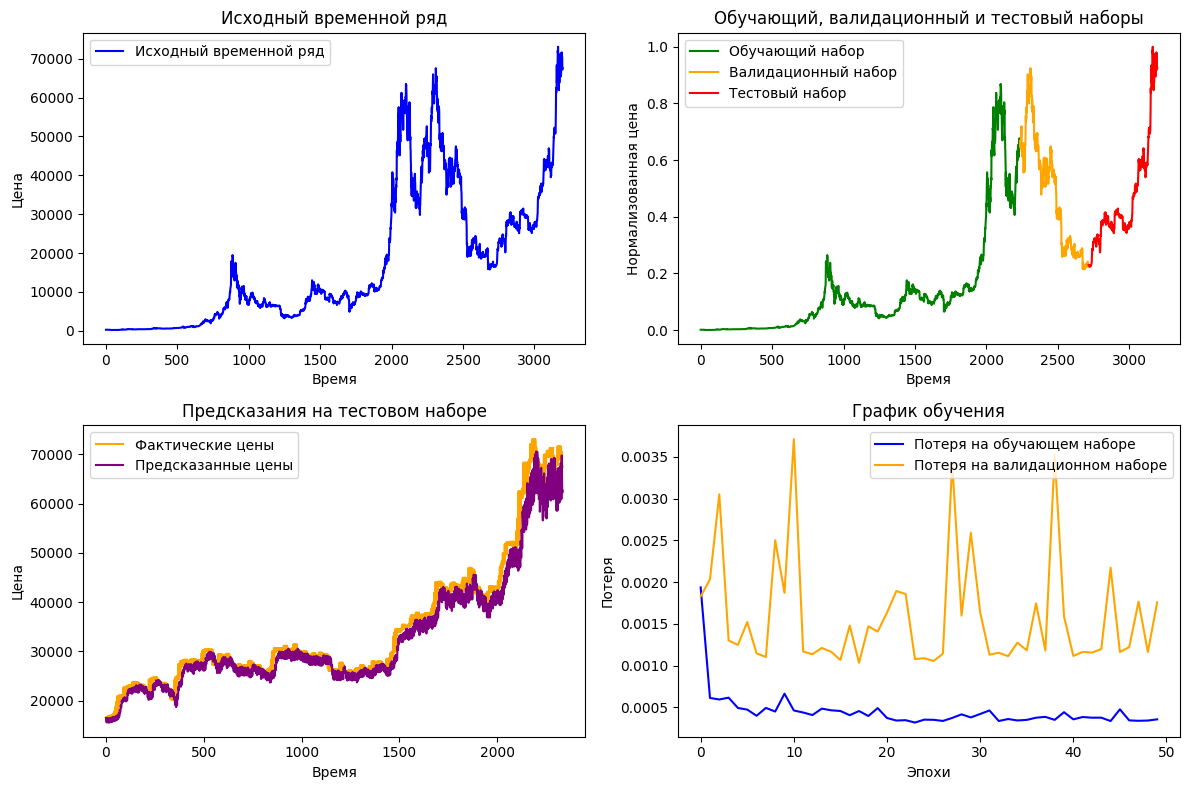

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Параметры
window_size = 10
future_steps = 5  # Количество шагов для предсказания

# Загружаем данные
data = pd.read_csv('/content/BTC-USD.csv')  # Данные должны содержать колонку 'Close'
prices = data['Close'].values.reshape(-1, 1)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Разделение на тренировочную, валидационную и тестовую выборки
train_size = int(len(scaled_prices) * 0.7)
val_size = int(len(scaled_prices) * 0.15)
test_size = len(scaled_prices) - train_size - val_size

train, val, test = scaled_prices[:train_size], scaled_prices[train_size:train_size + val_size], scaled_prices[train_size + val_size:]

# Генерация временных последовательностей
def create_dataset(data, window_size, future_steps):
    X, y = [], []
    for i in range(len(data) - window_size - future_steps + 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size:i + window_size + future_steps])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train, window_size, future_steps)
X_val, y_val = create_dataset(val, window_size, future_steps)
X_test, y_test = create_dataset(test, window_size, future_steps)

# Изменение формы данных
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Определение модели Seq2Seq с Attention
class Seq2SeqModel(tf.keras.Model):
    def __init__(self, window_size, future_steps):
        super(Seq2SeqModel, self).__init__()
        self.encoder_rnn = tf.keras.layers.SimpleRNN(50, return_sequences=True, return_state=True)
        self.attention = tf.keras.layers.Attention()
        self.decoder_rnn = tf.keras.layers.SimpleRNN(50, return_sequences=True)
        self.dense = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
        self.repeat_vector = tf.keras.layers.RepeatVector(future_steps)

    def call(self, inputs):
        encoder_outputs, state_h = self.encoder_rnn(inputs)
        context_vector = self.attention([encoder_outputs, encoder_outputs])
        decoder_inputs = self.repeat_vector(context_vector[:, -1, :])
        decoder_outputs = self.decoder_rnn(decoder_inputs, initial_state=state_h)
        return self.dense(decoder_outputs)

# Создание и компиляция модели
model = Seq2SeqModel(window_size, future_steps)
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Предсказания
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(-1, future_steps)

# Вычисление метрик
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1, future_steps)

mae = mean_absolute_error(y_test_inverse, predictions)
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(prices, label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучающего, валидационного и тестового наборов
plt.subplot(2, 2, 2)
plt.plot(range(train_size), train, label='Обучающий набор', color='green')
plt.plot(range(train_size, train_size + val_size), val, label='Валидационный набор', color='orange')
plt.plot(range(train_size + val_size, len(scaled_prices)), test, label='Тестовый набор', color='red')
plt.title('Обучающий, валидационный и тестовый наборы')
plt.xlabel('Время')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(y_test_inverse.flatten(), label='Фактические цены', color='orange')
plt.plot(predictions.flatten(), label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на валидационном наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()

Давайте подробно рассмотрим предоставленный код, который включает в себя обработку временных рядов, создание и обучение модели Seq2Seq с использованием механизма внимания (attention), а также оценку ее эффективности. Мы разберем его по шагам.

### Импорт библиотек

```python
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
```
1. **`pandas`**: используется для работы с табличными данными, удобна для загрузки и обработки данных.
2. **`numpy`**: библиотека для численных вычислений, здесь она используется для работы с массивами и матрицами.
3. **`MinMaxScaler`**: из библиотеки `sklearn` для нормализации данных, чтобы привести их к диапазону от 0 до 1.
4. **`tensorflow`**: библиотека для создания и обучения нейронных сетей.
5. **`matplotlib.pyplot`**: используется для визуализации данных и результатов.
6. **`mean_absolute_error` и `mean_squared_error`**: метрики для оценки качества предсказания модели.

### Параметры

```python
window_size = 10
future_steps = 5  # Количество шагов для предсказания
```
- **`window_size`**: размер окна, определяющий, сколько предыдущих данных будет использоваться для предсказания.
- **`future_steps`**: количество шагов (временных единиц), которые необходимо предсказать вперед.

### Загрузка данных

```python
data = pd.read_csv('/content/BTC-USD.csv')  # Данные должны содержать колонку 'Close'
prices = data['Close'].values.reshape(-1, 1)
```
- Данные загружаются из CSV файла, содержащего исторические цены Bitcoin (BTC).
- Из датафрейма выбирается колонка 'Close', представляющая закрытые цены, и преобразуется в массив.

### Нормализация данных

```python
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)
```
- Создается объект `MinMaxScaler`, который будет преобразовывать данные в диапазон от 0 до 1.
- Метод `fit_transform` применяется к ценам, чтобы выполнить нормализацию.

### Разделение данных

```python
train_size = int(len(scaled_prices) * 0.7)
val_size = int(len(scaled_prices) * 0.15)
test_size = len(scaled_prices) - train_size - val_size

train, val, test = scaled_prices[:train_size], scaled_prices[train_size:train_size + val_size], scaled_prices[train_size + val_size:]
```
- Данные разделяются на три части: обучающая (70%), валидационная (15%) и тестовая (15%) выборки.
- `train`, `val`, `test` - соответствующие массивы нормализованных цен.

### Генерация временных последовательностей

```python
def create_dataset(data, window_size, future_steps):
    X, y = [], []
    for i in range(len(data) - window_size - future_steps + 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size:i + window_size + future_steps])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train, window_size, future_steps)
X_val, y_val = create_dataset(val, window_size, future_steps)
X_test, y_test = create_dataset(test, window_size, future_steps)
```
- Определяется функция `create_dataset`, которая создает обучающие и целевые наборы данных.
- **`X`** (входные данные): массивы данных, где каждое подмножество представляет собой окно размером `window_size`.
- **`y`** (выходные данные): массивы целевых значений, представляющие собой значения в будущем (количество шагов, определенное `future_steps`).
- После этого создаются обучающие, валидационные и тестовые наборы данных.

### Изменение формы данных

```python
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
```
- Данные reshaped для того, чтобы соответствовать формату, требуемому для входа в модель RNN (требует три измерения: количество образцов, длина последовательности, количество признаков).

### Определение модели Seq2Seq с Attention

```python
class Seq2SeqModel(tf.keras.Model):
    def __init__(self, window_size, future_steps):
        super(Seq2SeqModel, self).__init__()
        self.encoder_rnn = tf.keras.layers.SimpleRNN(50, return_sequences=True, return_state=True)
        self.attention = tf.keras.layers.Attention()
        self.decoder_rnn = tf.keras.layers.SimpleRNN(50, return_sequences=True)
        self.dense = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
        self.repeat_vector = tf.keras.layers.RepeatVector(future_steps)

    def call(self, inputs):
        encoder_outputs, state_h = self.encoder_rnn(inputs)
        context_vector = self.attention([encoder_outputs, encoder_outputs])
        decoder_inputs = self.repeat_vector(context_vector[:, -1, :])
        decoder_outputs = self.decoder_rnn(decoder_inputs, initial_state=state_h)
        return self.dense(decoder_outputs)
```
- Определяется класс `Seq2SeqModel`, который наследует от `tf.keras.Model`.
- **`SimpleRNN`**: используется для кодировщика и декодировщика, который обрабатывает временные последовательности.
- **`Attention`**: слой, который позволяет модели фокусироваться на определенных частях входных данных при генерации предсказаний.
- **`RepeatVector`**: повторяет выходные данные кодировщика для декодирования.
- Метод **`call`**: определяет порядок выполнения операций, обеспечивая взаимодействие между слоями.

### Создание и компиляция модели

```python
model = Seq2SeqModel(window_size, future_steps)
model.compile(optimizer='adam', loss='mean_squared_error')
```
- Создается экземпляр модели `Seq2SeqModel`.
- Модель компилируется с использованием оптимизатора `Adam` и функции потерь `mean_squared_error`, что важно для регрессионных задач.

### Обучение модели

```python
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
```
- Модель обучается на обучающем наборе данных в течение 50 эпох, с валидацией на валидационном наборе данных.

### Предсказания

```python
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(-1, future_steps)
```
- После обучения модель делает предсказания на тестовом наборе.
- Результаты предсказаний обратного преобразования (инверсия) масштабируются обратно в оригинальный диапазон цен.

### Вычисление метрик

```python
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1, future_steps)

mae = mean_absolute_error(y_test_inverse, predictions)
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
```
- Инверсия тестовых целевых данных для корректного сравнения.
- Вычисляются две метрики: **MAE** (средняя абсолютная ошибка) и **RMSE** (корень из средней квадратичной ошибки) для оценки качества модели.

### Визуализация

```python
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(prices, label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучающего, валидационного и тестового наборов
plt.subplot(2, 2, 2)
plt.plot(range(train_size), train, label='Обучающий набор', color='green')
plt.plot(range(train_size, train_size + val_size), val, label='Валидационный набор', color='orange')
plt.plot(range(train_size + val_size, len(scaled_prices)), test, label='Тестовый набор', color='red')
plt.title('Обучающий, валидационный и тестовый наборы')
plt.xlabel('Время')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(y_test_inverse.flatten(), label='Фактические цены', color='orange')
plt.plot(predictions.flatten(), label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# Граф

ик обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на валидационном наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()
```
- Создается фигура для визуализации различных графиков.
- Графики показывают: исходный временной ряд, распределение обучающих/валидационных/тестовых наборов, фактические и предсказанные цены на тестовом наборе, а также кривые потерь во время обучения.

### Заключение

В итоге данный код иллюстрирует процесс создания и обучения модели для предсказания цен на Bitcoin, используя подход Seq2Seq с механизмом внимания. Процесс включает загрузку и нормализацию данных, создание временных последовательностей, определение модели, ее обучение и оценку, а также визуализацию результатов.

#LSTM

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0154 - val_loss: 0.0030
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.0881e-04 - val_loss: 0.0023
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.4173e-04 - val_loss: 0.0018
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.8276e-04 - val_loss: 0.0023
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.5989e-04 - val_loss: 0.0018
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.2022e-04 - val_loss: 0.0030
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.4923e-04 - val_loss: 0.0018
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.7645e-04 - val_loss: 0.0015
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.9224e-04 - val_loss: 0.0025
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.1144e-04 - val_loss: 0.0015
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.1017e-04 - val_loss: 0.0017
Epoch 12/50
70/70 ━━━━━

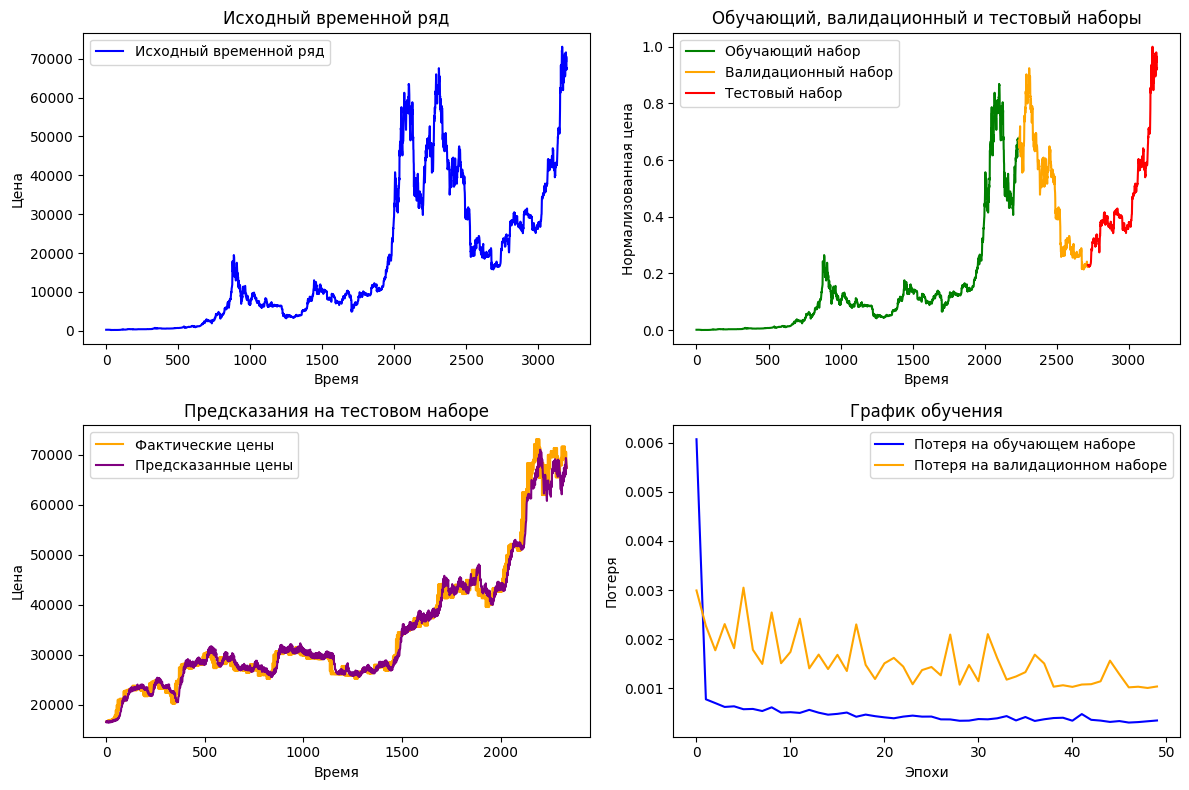

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Параметры
window_size = 10
future_steps = 5  # Количество шагов для предсказания

# Загружаем данные
data = pd.read_csv('/content/BTC-USD.csv')  # Данные должны содержать колонку 'Close'
prices = data['Close'].values.reshape(-1, 1)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Разделение на тренировочную, валидационную и тестовую выборки
train_size = int(len(scaled_prices) * 0.7)
val_size = int(len(scaled_prices) * 0.15)
test_size = len(scaled_prices) - train_size - val_size

train, val, test = scaled_prices[:train_size], scaled_prices[train_size:train_size + val_size], scaled_prices[train_size + val_size:]

# Генерация временных последовательностей
def create_dataset(data, window_size, future_steps):
    X, y = [], []
    for i in range(len(data) - window_size - future_steps + 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size:i + window_size + future_steps])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train, window_size, future_steps)
X_val, y_val = create_dataset(val, window_size, future_steps)
X_test, y_test = create_dataset(test, window_size, future_steps)

# Изменение формы данных
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Определение модели Seq2Seq с LSTM и Attention
class Seq2SeqModel(tf.keras.Model):
    def __init__(self, window_size, future_steps):
        super(Seq2SeqModel, self).__init__()
        self.encoder_lstm = tf.keras.layers.LSTM(50, return_sequences=True, return_state=True)
        self.attention = tf.keras.layers.Attention()
        self.decoder_lstm = tf.keras.layers.LSTM(50, return_sequences=True)
        self.dense = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
        self.repeat_vector = tf.keras.layers.RepeatVector(future_steps)

    def call(self, inputs):
        encoder_outputs, state_h, state_c = self.encoder_lstm(inputs)
        context_vector = self.attention([encoder_outputs, encoder_outputs])
        decoder_inputs = self.repeat_vector(context_vector[:, -1, :])
        decoder_outputs = self.decoder_lstm(decoder_inputs, initial_state=[state_h, state_c])
        return self.dense(decoder_outputs)

# Создание и компиляция модели
model = Seq2SeqModel(window_size, future_steps)
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Предсказания
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(-1, future_steps)

# Вычисление метрик
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1, future_steps)

mae = mean_absolute_error(y_test_inverse, predictions)
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(prices, label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучающего, валидационного и тестового наборов
plt.subplot(2, 2, 2)
plt.plot(range(train_size), train, label='Обучающий набор', color='green')
plt.plot(range(train_size, train_size + val_size), val, label='Валидационный набор', color='orange')
plt.plot(range(train_size + val_size, len(scaled_prices)), test, label='Тестовый набор', color='red')
plt.title('Обучающий, валидационный и тестовый наборы')
plt.xlabel('Время')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(y_test_inverse.flatten(), label='Фактические цены', color='orange')
plt.plot(predictions.flatten(), label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на валидационном наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()


```
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(window_size, 1)),
    Dropout(0.2),
    Dense(1)
])
```
Этот код создает модель нейронной сети с использованием Keras, которая включает в себя слой LSTM. Давайте разберем его по частям:

1. **Sequential**: Это тип модели, который позволяет добавлять слои последовательно, один за другим.

2. **LSTM(50, activation='tanh', input_shape=(window_size, 1))**:
   - **LSTM** (Long Short-Term Memory) — это тип рекуррентной нейронной сети, оптимизированный для работы с последовательными данными.
   - `50` указывает на количество единиц в слое LSTM, что определяет размер скрытого состояния.
   - `activation='tanh'` задает функцию активации, которая используется для нормализации выходных значений.
   - `input_shape=(window_size, 1)` задает форму входных данных, где `window_size` — это количество временных шагов, а `1` — количество признаков на каждом шаге.

3. **Dropout(0.2)**: Этот слой используется для регуляризации модели, отключая 20% нейронов во время обучения, что помогает предотвратить переобучение.

4. **Dense(1)**: Это полносвязный слой с одним выходом, который обычно используется для задач регрессии или бинарной классификации, где требуется одно значение на выходе.

Таким образом, эта модель предназначена для обработки последовательных данных с использованием LSTM, и включает механизм регуляризации для улучшения обобщающей способности модели.



##GRU

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0214 - val_loss: 0.0027
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.5472e-04 - val_loss: 0.0022
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.8741e-04 - val_loss: 0.0018
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.4828e-04 - val_loss: 0.0016
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.2430e-04 - val_loss: 0.0016
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.3528e-04 - val_loss: 0.0017
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.1025e-04 - val_loss: 0.0016
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.0619e-04 - val_loss: 0.0015
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.7371e-04 - val_loss: 0.0015
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.7125e-04 - val_loss: 0.0015
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.7548e-04 - val_loss: 0.0013
Epoch 12/50
70/70 ━━━━━

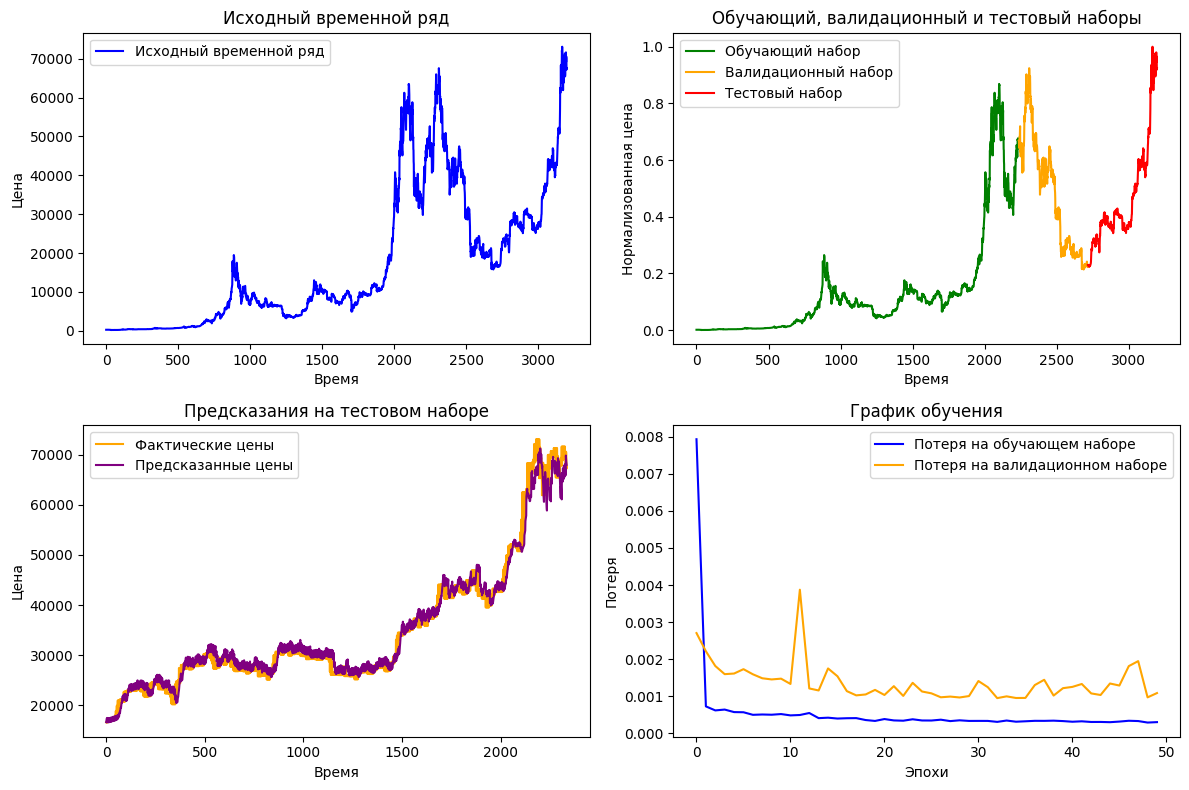

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Параметры
window_size = 10
future_steps = 5  # Количество шагов для предсказания

# Загружаем данные
data = pd.read_csv('/content/BTC-USD.csv')  # Данные должны содержать колонку 'Close'
prices = data['Close'].values.reshape(-1, 1)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Разделение на тренировочную, валидационную и тестовую выборки
train_size = int(len(scaled_prices) * 0.7)
val_size = int(len(scaled_prices) * 0.15)
test_size = len(scaled_prices) - train_size - val_size

train, val, test = scaled_prices[:train_size], scaled_prices[train_size:train_size + val_size], scaled_prices[train_size + val_size:]

# Генерация временных последовательностей
def create_dataset(data, window_size, future_steps):
    X, y = [], []
    for i in range(len(data) - window_size - future_steps + 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size:i + window_size + future_steps])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train, window_size, future_steps)
X_val, y_val = create_dataset(val, window_size, future_steps)
X_test, y_test = create_dataset(test, window_size, future_steps)

# Изменение формы данных
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Определение модели Seq2Seq с Attention
class Seq2SeqModel(tf.keras.Model):
    def __init__(self, window_size, future_steps):
        super(Seq2SeqModel, self).__init__()
        self.encoder_gru = tf.keras.layers.GRU(50, return_sequences=True, return_state=True)
        self.attention = tf.keras.layers.Attention()
        self.decoder_gru = tf.keras.layers.GRU(50, return_sequences=True)
        self.dense = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
        self.repeat_vector = tf.keras.layers.RepeatVector(future_steps)

    def call(self, inputs):
        encoder_outputs, state_h = self.encoder_gru(inputs)
        context_vector = self.attention([encoder_outputs, encoder_outputs])
        decoder_inputs = self.repeat_vector(context_vector[:, -1, :])
        decoder_outputs = self.decoder_gru(decoder_inputs, initial_state=state_h)
        return self.dense(decoder_outputs)

# Создание и компиляция модели
model = Seq2SeqModel(window_size, future_steps)
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Предсказания
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(-1, future_steps)

# Вычисление метрик
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1, future_steps)

mae = mean_absolute_error(y_test_inverse, predictions)
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(prices, label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучающего, валидационного и тестового наборов
plt.subplot(2, 2, 2)
plt.plot(range(train_size), train, label='Обучающий набор', color='green')
plt.plot(range(train_size, train_size + val_size), val, label='Валидационный набор', color='orange')
plt.plot(range(train_size + val_size, len(scaled_prices)), test, label='Тестовый набор', color='red')
plt.title('Обучающий, валидационный и тестовый наборы')
plt.xlabel('Время')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(y_test_inverse.flatten(), label='Фактические цены', color='orange')
plt.plot(predictions.flatten(), label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на валидационном наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()



```
model = Sequential([
    GRU(50, activation='tanh', input_shape=(window_size, 1)),
    Dropout(0.2),
    Dense(1)
])
```

Этот код создает простую модель нейронной сети с использованием Keras. Давайте разберем его по частям:

1. **Sequential**: Это тип модели, позволяющий добавлять слои последовательно, то есть один за другим.

2. **GRU(50, activation='tanh', input_shape=(window_size, 1))**:
   - **GRU** (Gated Recurrent Unit) — это тип рекуррентной нейронной сети, предназначенный для обработки последовательных данных.
   - `50` указывает на количество единиц GRU, что определяет размер скрытого состояния.
   - `activation='tanh'` задает функцию активации, используемую для нормализации выходных значений.
   - `input_shape=(window_size, 1)` задает форму входных данных, где `window_size` — это количество временных шагов, а `1` — количество признаков на каждом шаге.

3. **Dropout(0.2)**: Этот слой используется для регуляризации модели, случайным образом отключая 20% нейронов во время обучения. Это помогает предотвратить переобучение.

4. **Dense(1)**: Это полносвязный слой с одним выходом, который обычно используется для задач регрессии или бинарной классификации, где требуется одно значение на выходе.

Таким образом, эта модель предназначена для обработки последовательных данных с использованием GRU, и включает механизм регуляризации для улучшения обобщающей способности.




## Bidirectional

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 0.0080 - val_loss: 0.0022
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.2234e-04 - val_loss: 0.0017
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.5530e-04 - val_loss: 0.0018
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.0026e-04 - val_loss: 0.0019
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.3741e-04 - val_loss: 0.0027
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.3460e-04 - val_loss: 0.0015
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.6550e-04 - val_loss: 0.0033
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.1111e-04 - val_loss: 0.0029
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.7814e-04 - val_loss: 0.0052
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.5050e-04 - val_loss: 0.0016
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.8543e-04 - val_loss: 0.0019
Epoch 12/50
70/70 ━━━━

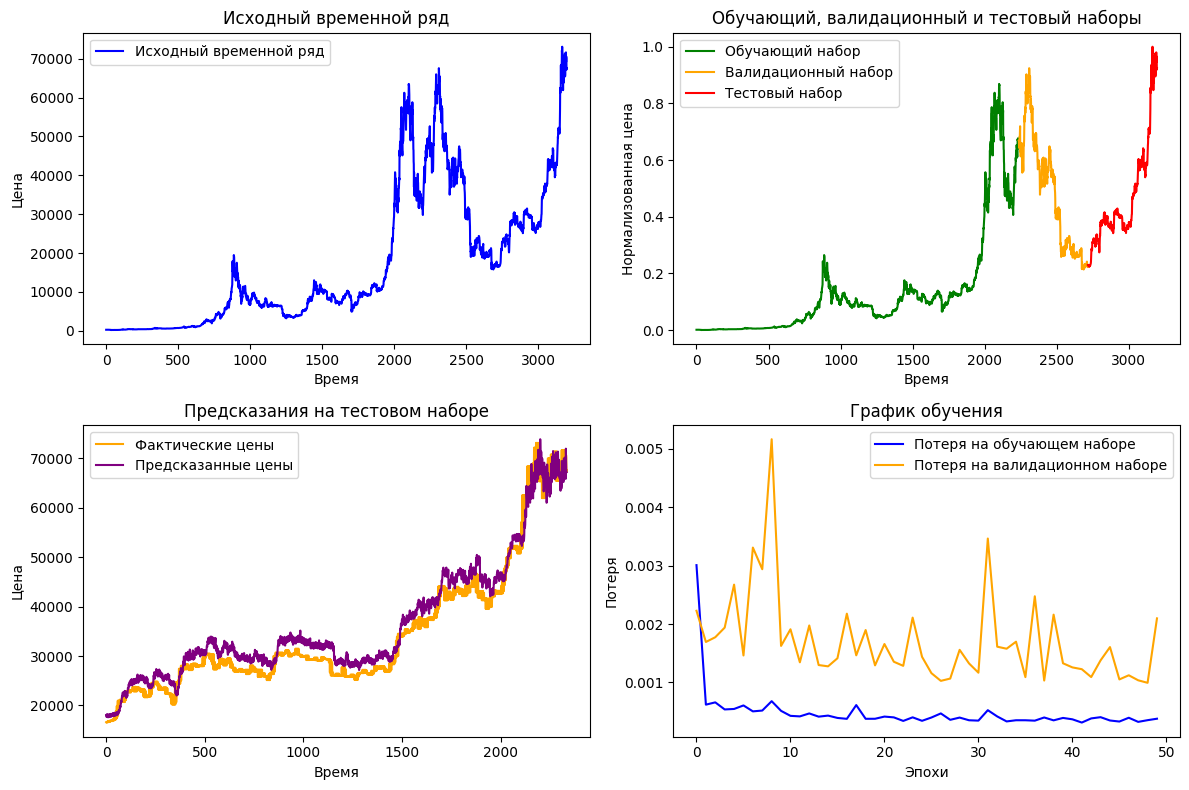

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Параметры
window_size = 10
future_steps = 5  # Количество шагов для предсказания

# Загружаем данные
data = pd.read_csv('/content/BTC-USD.csv')  # Данные должны содержать колонку 'Close'
prices = data['Close'].values.reshape(-1, 1)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Разделение на тренировочную, валидационную и тестовую выборки
train_size = int(len(scaled_prices) * 0.7)
val_size = int(len(scaled_prices) * 0.15)
test_size = len(scaled_prices) - train_size - val_size

train, val, test = scaled_prices[:train_size], scaled_prices[train_size:train_size + val_size], scaled_prices[train_size + val_size:]

# Генерация временных последовательностей
def create_dataset(data, window_size, future_steps):
    X, y = [], []
    for i in range(len(data) - window_size - future_steps + 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size:i + window_size + future_steps])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train, window_size, future_steps)
X_val, y_val = create_dataset(val, window_size, future_steps)
X_test, y_test = create_dataset(test, window_size, future_steps)

# Изменение формы данных
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Определение модели Seq2Seq с Attention и BiRNN
class Seq2SeqModel(tf.keras.Model):
    def __init__(self, window_size, future_steps):
        super(Seq2SeqModel, self).__init__()
        self.encoder_rnn = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(50, return_sequences=True, return_state=True))
        self.attention = tf.keras.layers.Attention()
        self.decoder_rnn = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(50, return_sequences=True))
        self.dense = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
        self.repeat_vector = tf.keras.layers.RepeatVector(future_steps)

    def call(self, inputs):
        encoder_outputs, forward_state_h, backward_state_h = self.encoder_rnn(inputs)
        context_vector = self.attention([encoder_outputs, encoder_outputs])
        decoder_inputs = self.repeat_vector(context_vector[:, -1, :])
        decoder_outputs = self.decoder_rnn(decoder_inputs)
        return self.dense(decoder_outputs)

# Создание и компиляция модели
model = Seq2SeqModel(window_size, future_steps)
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Предсказания
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(-1, future_steps)

# Вычисление метрик
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1, future_steps)

mae = mean_absolute_error(y_test_inverse, predictions)
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(prices, label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучающего, валидационного и тестового наборов
plt.subplot(2, 2, 2)
plt.plot(range(train_size), train, label='Обучающий набор', color='green')
plt.plot(range(train_size, train_size + val_size), val, label='Валидационный набор', color='orange')
plt.plot(range(train_size + val_size, len(scaled_prices)), test, label='Тестовый набор', color='red')
plt.title('Обучающий, валидационный и тестовый наборы')
plt.xlabel('Время')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(y_test_inverse.flatten(), label='Фактические цены', color='orange')
plt.plot(predictions.flatten(), label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на валидационном наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()

Этот код создает и обучает модель нейронной сети с использованием библиотеки Keras. Давайте разберем его по частям:

1. **Sequential**: Это тип модели, который представляет собой линейную последовательность слоев. Слои добавляются один за другим.

2. **Bidirectional**: Этот слой позволяет модели обрабатывать последовательные данные в обоих направлениях (вперед и назад). Это полезно для задач, связанных с временными рядами или текстом, где контекст может быть важен как до, так и после текущего элемента.

3. **GRU(50, activation='tanh', return_sequences=False)**:
   - **GRU** (Gated Recurrent Unit) — это тип рекуррентной нейронной сети, который используется для обработки последовательных данных.
   - Параметр `50` указывает на количество единиц GRU, что определяет размер скрытого состояния.
   - `activation='tanh'` задает функцию активации, которая используется для нормализации выходных значений.
   - `return_sequences=False` означает, что слой будет возвращать только последнее состояние, а не последовательность состояний.

4. **Dropout(0.2)**: Этот слой используется для регуляризации модели, случайным образом отключая 20% нейронов во время обучения, что помогает предотвратить переобучение.

5. **Dense(1)**: Это полносвязный слой, который имеет 1 выход. Он обычно используется для задач регрессии или бинарной классификации, где требуется один выходной результат.


Давайте рассмотрим конкретный числовой пример, чтобы объяснить суть BiRNN (двунаправленной рекуррентной нейронной сети) с использованием GRU.

### Пример

Предположим, у нас есть последовательность слов, и мы хотим предсказать следующее слово на основе контекста. Рассмотрим следующую последовательность:

**Входная последовательность:** "Я люблю программировать на Python"

1. **Предобработка данных:**
   - Каждое слово преобразуется в вектор (например, с использованием word embeddings). Допустим, мы представим слова как векторы размерности 3:
     - "Я" → [0.1, 0.2, 0.3]
     - "люблю" → [0.4, 0.5, 0.6]
     - "программировать" → [0.7, 0.8, 0.9]
     - "на" → [0.1, 0.4, 0.5]
     - "Python" → [0.2, 0.3, 0.6]

2. **Формирование входных данных для BiRNN:**
   - Входные данные для модели будут представлять собой матрицу, где каждая строка соответствует вектору слова:
   ```
   [[0.1, 0.2, 0.3],
    [0.4, 0.5, 0.6],
    [0.7, 0.8, 0.9],
    [0.1, 0.4, 0.5],
    [0.2, 0.3, 0.6]]
   ```

3. **Обработка через BiRNN:**
   - Модель будет обрабатывать эту последовательность как в прямом, так и в обратном направлении.
   - Например, для слова "программировать" модель будет учитывать контекст как слева (например, "Я", "люблю") так и справа (например, "на", "Python").

4. **Выходные данные:**
   - После обработки модель может предсказать следующее слово, например, "язык", основываясь на контексте, который учитывает как предшествующие, так и последующие слова.

### Как работает GRU в BiRNN

- **GRU** использует механизмы затворов для управления потоком информации:
  - **Обновляющий затвор** решает, какую информацию сохранить из предыдущего состояния.
  - **Сбрасывающий затвор** определяет, какую информацию забыть.
  


Таким образом, этот код создает модель для обработки последовательных данных, которая включает в себя возможности для учета контекста, регуляризации и получения единственного предсказания.

Теперь приведем гибридной модели RNN, использующей разные архитектуры, такие как LSTM и GRU. В этой модели используется последовательность LSTM, за которой следует GRU:

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0072 - val_loss: 0.0023
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.6949e-04 - val_loss: 0.0022
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.9456e-04 - val_loss: 0.0021
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.6344e-04 - val_loss: 0.0021
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.8667e-04 - val_loss: 0.0019
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.8124e-04 - val_loss: 0.0020
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.8940e-04 - val_loss: 0.0027
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.8547e-04 - val_loss: 0.0020
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.3200e-04 - val_loss: 0.0041
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 6.2396e-04 - val_loss: 0.0017
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 4.2828e-04 - val_loss: 0.0019
Epoch 12/50
70/70 ━━━━━

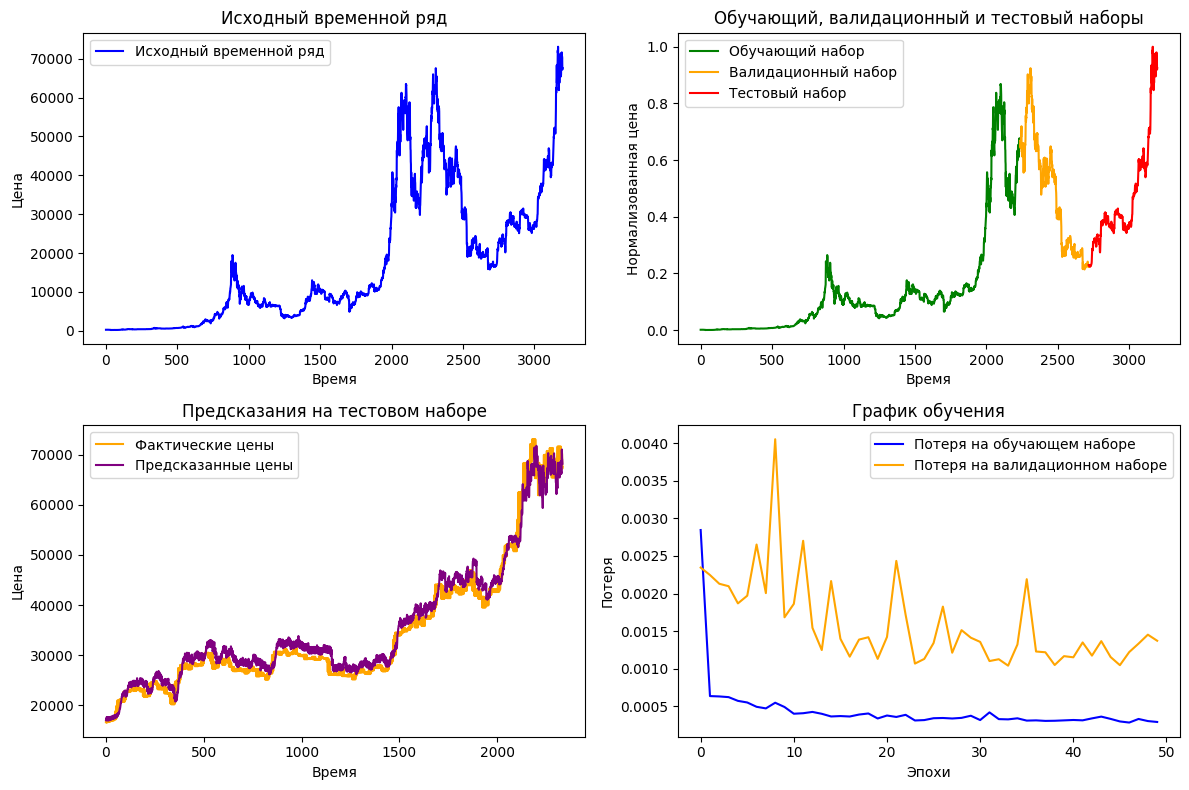

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Параметры
window_size = 10
future_steps = 5  # Количество шагов для предсказания

# Загружаем данные
data = pd.read_csv('/content/BTC-USD.csv')  # Данные должны содержать колонку 'Close'
prices = data['Close'].values.reshape(-1, 1)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Разделение на тренировочную, валидационную и тестовую выборки
train_size = int(len(scaled_prices) * 0.7)
val_size = int(len(scaled_prices) * 0.15)
test_size = len(scaled_prices) - train_size - val_size

train, val, test = scaled_prices[:train_size], scaled_prices[train_size:train_size + val_size], scaled_prices[train_size + val_size:]

# Генерация временных последовательностей
def create_dataset(data, window_size, future_steps):
    X, y = [], []
    for i in range(len(data) - window_size - future_steps + 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size:i + window_size + future_steps])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train, window_size, future_steps)
X_val, y_val = create_dataset(val, window_size, future_steps)
X_test, y_test = create_dataset(test, window_size, future_steps)

# Изменение формы данных
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Определение модели с использованием различных вариаций RNN
class RNNModel(tf.keras.Model):
    def __init__(self, window_size, future_steps):
        super(RNNModel, self).__init__()
        self.rnn1 = tf.keras.layers.SimpleRNN(50, return_sequences=True)
        self.rnn2 = tf.keras.layers.GRU(50, return_sequences=True)
        self.rnn3 = tf.keras.layers.LSTM(50, return_sequences=False)  # Установим return_sequences=False
        self.dense = tf.keras.layers.Dense(future_steps)  # Выходной слой для future_steps

    def call(self, inputs):
        x = self.rnn1(inputs)
        x = self.rnn2(x)
        x = self.rnn3(x)
        return self.dense(x)

# Создание и компиляция модели
model = RNNModel(window_size, future_steps)
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Предсказания
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, future_steps))

# Вычисление метрик
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, future_steps))

mae = mean_absolute_error(y_test_inverse, predictions)
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(prices, label='Исходный временной ряд', color='blue')
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучающего, валидационного и тестового наборов
plt.subplot(2, 2, 2)
plt.plot(range(train_size), train, label='Обучающий набор', color='green')
plt.plot(range(train_size, train_size + val_size), val, label='Валидационный набор', color='orange')
plt.plot(range(train_size + val_size, len(scaled_prices)), test, label='Тестовый набор', color='red')
plt.title('Обучающий, валидационный и тестовый наборы')
plt.xlabel('Время')
plt.ylabel('Нормализованная цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 3)
plt.plot(y_test_inverse.flatten(), label='Фактические цены', color='orange')
plt.plot(predictions.flatten(), label='Предсказанные цены', color='purple')
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на валидационном наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()

##RNN для многомерного временного ряда
Чтобы адаптировать ваш код для прогнозирования многомерного временного ряда, необходимо внести несколько изменений. В частности, нужно использовать все доступные признаки (колонки) в датасете, а не только 'Close'. Вот адаптированный код:



Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0531 - val_loss: 0.0055
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.4082e-04 - val_loss: 0.0048
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.6793e-04 - val_loss: 0.0025
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.6273e-04 - val_loss: 0.0026
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.3007e-04 - val_loss: 0.0025
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8688e-04 - val_loss: 0.0020
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.6016e-04 - val_loss: 0.0018
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.5954e-04 - val_loss: 0.0020
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.1776e-04 - val_loss: 0.0014
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.8191e-04 - val_loss: 0.0017
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━━━

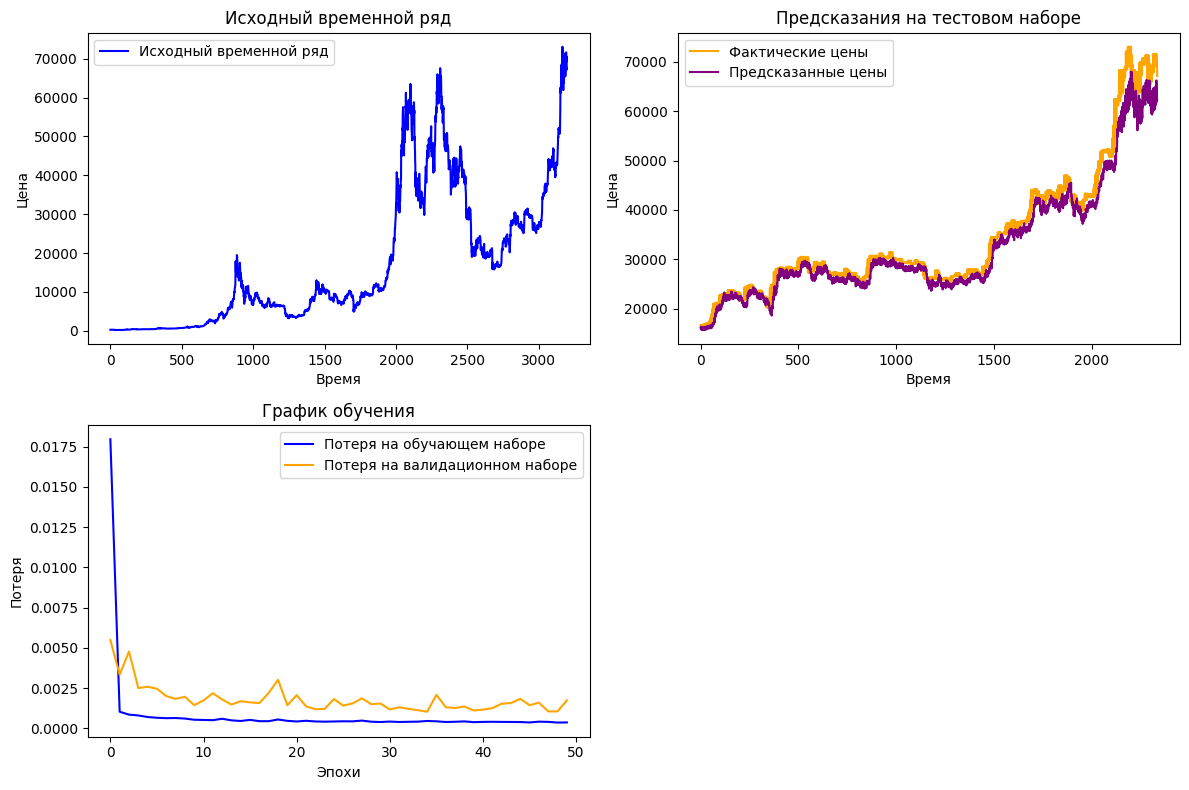

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Параметры
window_size = 10
future_steps = 5  # Количество шагов для предсказания

# Загружаем данные
data = pd.read_csv('/content/BTC-USD.csv')  # Замените на путь к вашему файлу
features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values  # Используем все признаки

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Разделение на тренировочную, валидационную и тестовую выборки
train_size = int(len(scaled_features) * 0.7)
val_size = int(len(scaled_features) * 0.15)
test_size = len(scaled_features) - train_size - val_size

train, val, test = scaled_features[:train_size], scaled_features[train_size:train_size + val_size], scaled_features[train_size + val_size:]

# Генерация временных последовательностей
def create_dataset(data, window_size, future_steps):
    X, y = [], []
    for i in range(len(data) - window_size - future_steps + 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size:i + window_size + future_steps])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train, window_size, future_steps)
X_val, y_val = create_dataset(val, window_size, future_steps)
X_test, y_test = create_dataset(test, window_size, future_steps)

# Изменение формы данных
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], X_val.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Определение модели Seq2Seq с Attention
class Seq2SeqModel(tf.keras.Model):
    def __init__(self, window_size, future_steps):
        super(Seq2SeqModel, self).__init__()
        self.encoder_rnn = tf.keras.layers.SimpleRNN(50, return_sequences=True, return_state=True)
        self.attention = tf.keras.layers.Attention()
        self.decoder_rnn = tf.keras.layers.SimpleRNN(50, return_sequences=True)
        self.dense = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(5))  # 5 выходов для всех признаков
        self.repeat_vector = tf.keras.layers.RepeatVector(future_steps)

    def call(self, inputs):
        encoder_outputs, state_h = self.encoder_rnn(inputs)
        context_vector = self.attention([encoder_outputs, encoder_outputs])
        decoder_inputs = self.repeat_vector(context_vector[:, -1, :])
        decoder_outputs = self.decoder_rnn(decoder_inputs, initial_state=state_h)
        return self.dense(decoder_outputs)

# Создание и компиляция модели
model = Seq2SeqModel(window_size, future_steps)
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Предсказания
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 5)).reshape(-1, future_steps, 5)

# Вычисление метрик
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 5)).reshape(-1, future_steps, 5)

mae = mean_absolute_error(y_test_inverse[:, :, 0].flatten(), predictions[:, :, 0].flatten())  # Используем только 'Close' для метрики
rmse = np.sqrt(mean_squared_error(y_test_inverse[:, :, 0].flatten(), predictions[:, :, 0].flatten()))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(features[:, 3], label='Исходный временной ряд', color='blue')  # 'Close' цена
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График тестовых данных и прогнозирования
plt.subplot(2, 2, 2)
plt.plot(y_test_inverse[:, :, 0].flatten(), label='Фактические цены', color='orange')  # 'Close' цена
plt.plot(predictions[:, :, 0].flatten(), label='Предсказанные цены', color='purple')  # 'Close' цена
plt.title('Предсказания на тестовом наборе')
plt.xlabel('Время')
plt.ylabel('Цена')
plt.legend()

# График обучения
plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label='Потеря на обучающем наборе', color='blue')
plt.plot(history.history['val_loss'], label='Потеря на валидационном наборе', color='orange')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

plt.tight_layout()
plt.show()